In [14]:
"""
Let's recap:

We got some data and created a trading rule
"""
from sysdata.sim.db_futures_sim_data import dbFuturesSimData
data = dbFuturesSimData()
from systems.provided.rules.ewmac import ewmac_forecast_with_defaults as ewmac
from systems.forecasting import Rules
from systems.basesystem import System
from systems.trading_rules import TradingRule
from sysdata.config.configdata import Config
from systems.forecast_scale_cap import ForecastScaleCap
from systems.forecast_combine import ForecastCombine
from systems.accounts.accounts_stage import Account
from systems.rawdata import RawData
from systems.positionsizing import PositionSizing
from systems.portfolio import Portfolios

ewmac_8 = TradingRule((ewmac, [], dict(Lfast=8, Lslow=32)))
ewmac_32 = TradingRule(dict(function=ewmac, other_args=dict(Lfast=32, Lslow=128)))
ewmac_64 = TradingRule(dict(function=ewmac, other_args=dict(Lfast=64)))
my_rules = Rules(dict(ewmac8=ewmac_8, ewmac32=ewmac_32, ewmac64=ewmac_64))

my_config = Config()
my_config

# empty_rules = Rules()
# my_config.trading_rules = dict(ewmac8=ewmac_8, ewmac32=ewmac_32)
# my_system = System([empty_rules], data, my_config)
# my_system.rules.get_raw_forecast("SOFR", "ewmac32").tail(5)

# For GPM
#IEF - US10
#GLD - GOLD
#PDBC - BBCOMM
#EWJ - Japan?
#TLT - US30Y_micro
#VNQ - US-REALESTATE
# QQQ - NASDAQ_micro
#LQD - IG
#VGK - European? DAX?
#IWM - miccros/small
#HYG - high-yield
#SPY - SPY_micro

#Try to replicate Faber approximately
# Asset	Allocation	Change
# International Treasuries	5.0%	-
## BUND ? (German 10 year)
# Emerging Market Equities	10.0%	-
## HANG_mini ? (Chinese stocks)
# International Equities	10.0%	-
## DAX (German stocks)
# Gold	10.0%	-
## GOLD_micro
# Int-Term US Treasuries	5.0%	-
## US10
# US Large Cap Value	5.0%	
## SP500-VALUE	
# US Small Cap Value	5.0%	-
## SP600-SMALL
# US Corporate Bonds	5.0%	-
## IG
# US Momentum	10.0%	-
## SP500_micro
# Long-Term US Treasuries	5.0%	
## US30Y_micro
# US Real Estate	20.0%	-
## US-REALESTATE
# Commodities
## BBCOMM
# QQQ
## NASDAQ_micro

# we can estimate these ourselves
my_config.instruments = ["BUND", "HANG_mini", "DAX", "GOLD_micro", "US10", "R1000", "IG","SP500_micro", "US30", "US-REALESTATE", "BBCOMM", "NASDAQ_micro"]
my_config.use_forecast_scale_estimates = True

fcs = ForecastScaleCap()
combiner = ForecastCombine()
my_account = Account()
combiner = ForecastCombine()
raw_data = RawData()
position_size = PositionSizing()
possizer = PositionSizing()
portfolio = Portfolios()

my_config.percentage_vol_target = 15
my_config.notional_trading_capital = 10000000
my_config.base_currency = "USD"
my_config.forecast_weight_estimate = dict(method="one_period")
my_config.use_instrument_weight_estimates = True
my_config.use_instrument_div_mult_estimates = True
my_config.use_forecast_weight_estimates = True
my_config.use_forecast_div_mult_estimates = True
my_config.forecast_floor = 0

#my_config.capital_multiplier['func'] = 'syscore.capital.full_compounding'


my_system = System(
    [my_account, fcs, my_rules, combiner, possizer, portfolio, raw_data],
    data,
    my_config,
)

# print(my_system.combForecast.get_forecast_weights("SOFR").tail(5))
# # or we can use the values from the book
# my_config.forecast_scalars = dict(ewmac8=5.3, ewmac32=2.65)
# my_config.use_forecast_scale_estimates = False
# fcs = ForecastScaleCap()
# my_system = System([fcs, my_rules], data, my_config)
# print(my_system.forecastScaleCap.get_capped_forecast("SOFR", "ewmac32").tail(5))
my_system.accounts.portfolio().percent.stats()

2024-08-05 17:15:34 DEBUG config {'type': 'config', 'stage': 'config'} Adding config defaults
2024-08-05 17:15:34 DEBUG base_system Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2024-08-05 17:15:34 DEBUG base_system Following instruments are marked as 'ignore_instruments': not included: ['ETHANOL', 'NIFTY', 'USIRS10', 'USIRS2ERIS', 'USIRS5', 'USIRS5ERIS']
2024-08-05 17:15:34 DEBUG base_system Following instruments removed entirely from sim: ['Another_thing', 'ETHANOL', 'NIFTY', 'USIRS10', 'USIRS2ERIS', 'USIRS5', 'USIRS5ERIS', 'bad_thing']
2024-08-05 17:15:34 INFO base_system {'stage': 'accounts'} Calculating pandl for portfolio
2024-08-05 17:15:34 DEBUG base_system {'stage': 'positionSize'} Getting vol target
2024-08-05 17:15:34 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'BBCOMM'} Calculating pandl for instrument for BBCOMM
2024-08-05 17:15:34 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'BBCOMM'} Calculating notional posit

/home/trader/pysystemtrade/sysquant/estimators/forecast_scalar.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaling_factor = scaling_factor.fillna(method="bfill")


2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'GOLD_micro'} Calculating raw forecast GOLD_micro for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'HANG_mini'} Calculating raw forecast HANG_mini for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'IG'} Calculating raw forecast IG for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'NASDAQ_micro'} Calculating raw forecast NASDAQ_micro for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'R1000'} Calculating raw forecast R1000 for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500_micro'} Calculating raw forecast SP500_micro for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'rules', 'instrument_code': 'US-REALESTATE'} Calculating raw forecast US-REALESTATE for ewmac64
2024-08-05 17:15:36 DEBUG base_system {'stage': 'r

/home/trader/pysystemtrade/sysquant/estimators/forecast_scalar.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaling_factor = scaling_factor.fillna(method="bfill")


2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'GOLD_micro'} Calculating raw forecast GOLD_micro for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'HANG_mini'} Calculating raw forecast HANG_mini for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'IG'} Calculating raw forecast IG for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'NASDAQ_micro'} Calculating raw forecast NASDAQ_micro for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'R1000'} Calculating raw forecast R1000 for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500_micro'} Calculating raw forecast SP500_micro for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 'instrument_code': 'US-REALESTATE'} Calculating raw forecast US-REALESTATE for ewmac8
2024-08-05 17:15:37 DEBUG base_system {'stage': 'rules', 

/home/trader/pysystemtrade/sysquant/estimators/forecast_scalar.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaling_factor = scaling_factor.fillna(method="bfill")


2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'GOLD_micro'} Calculating capped forecast for GOLD_micro ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'HANG_mini'} Calculating capped forecast for HANG_mini ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'IG'} Calculating capped forecast for IG ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'NASDAQ_micro'} Calculating capped forecast for NASDAQ_micro ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'R1000'} Calculating capped forecast for R1000 ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'SP500_micro'} Calculating capped forecast for SP500_micro ewmac32
2024-08-05 17:15:38 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'US-REALESTATE'} Calcul

[[('min', '-9.698'),
  ('max', '6.964'),
  ('median', '0.01372'),
  ('mean', '0.03201'),
  ('std', '0.8325'),
  ('skew', '-0.4188'),
  ('ann_mean', '8.195'),
  ('ann_std', '13.32'),
  ('sharpe', '0.6152'),
  ('sortino', '0.7476'),
  ('avg_drawdown', '-12.74'),
  ('time_in_drawdown', '0.9601'),
  ('calmar', '0.202'),
  ('avg_return_to_drawdown', '0.6434'),
  ('avg_loss', '-0.5182'),
  ('avg_gain', '0.533'),
  ('gaintolossratio', '1.029'),
  ('profitfactor', '1.131'),
  ('hitrate', '0.5238'),
  ('t_stat', '4.363'),
  ('p_value', '1.294e-05')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

<Axes: >

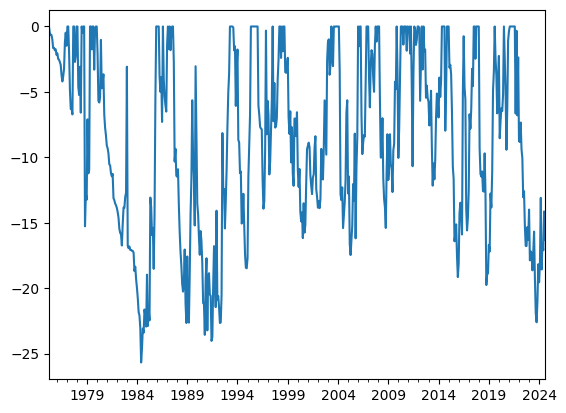

In [15]:
my_system.accounts.portfolio().percent.monthly.drawdown().plot()

<Axes: >

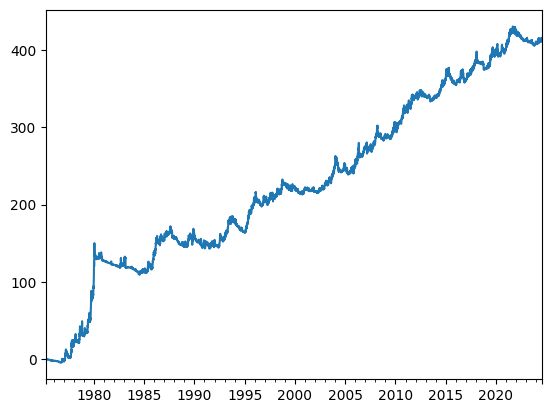

In [13]:
my_system.accounts.portfolio().percent.curve().plot()